# 1. Explore Distributions

## 1. Choose your sample size S. 10,000 is a good number.

In [1]:
S = 10_000

## 2. (12pt) Explore the shape of the distribution: draw S random numbers from LN(0, 0.2) (i.e. μ = 0 and σ = 0.2), LN(0, 0.5) and LN(0, 1.68). Display all these samples on a histogram while labeling clearly which one is which one. Do the histograms in two ways: a) linear-linear scale, and b) log-linear (x is log and y is linear), you just do histogram of log x instead of x (you can also set log scale in matplotlib, but the bin widths will look weird).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
first = np.random.lognormal(0, 0.2, size=S)
second = np.random.lognormal(0, 0.5, size=S)
third = np.random.lognormal(0, 1.68, size=S)

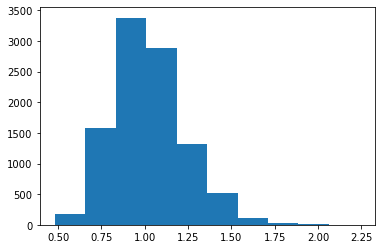

In [3]:
_ = plt.hist(first) ##LN(0, 0.2)

Looks slightly right skewed

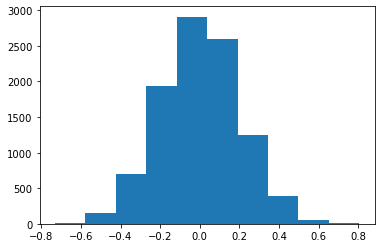

In [4]:
_ = plt.hist(np.log(first)) ##LN(0, 0.2)

Looks pretty normal and symmetric

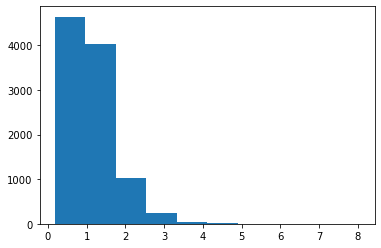

In [5]:
_ = plt.hist(second) ##LN(0, 0.5)

Looks right skewed

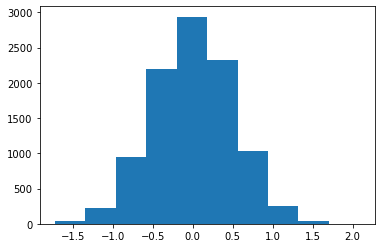

In [6]:
_ = plt.hist(np.log(second)) ##LN(0, 0.5)

Looks normal and symmetric

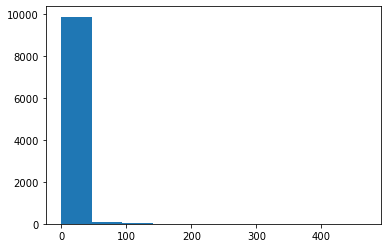

In [7]:
_ = plt.hist(third) ##LN(0, 1.68)

Looks skewed right, but majority of the values are in the first bin

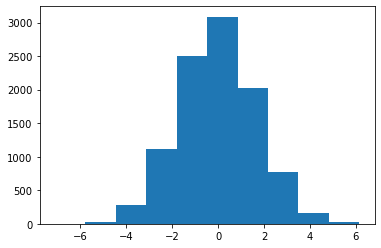

In [8]:
_ = plt.hist(np.log(third)) ##LN(0, 1.68)

Looks normal and symmetric

## 3. Look at the histograms and tell-what do you think, which one describes the least unequal distribution, and which one the most unequal distribution?


I would say the most equal distribution is the one where we take the log of (0, 0.5). The one that is most unequal is the distribution with (0, 1.68)

## 4. Compute sample means and variance (just use np.mean and such functions), and compare those with what you get using the corresponding theoretical formulas (2) and (3). Are these similar?
### EX = e^(μ+ 1/2 σ^2)
### VarX=e^(2μ+σ^2) * (eσ^2 − 1)

In [9]:
np.mean(first), np.var(first) #mean and variance of (0, 0.2)

(1.0221838062452402, 0.042791821612602324)

In [10]:
np.exp(0 + 1/2 * np.square(0.2)), np.exp(2 * 0 + np.square(.2)) * (np.exp(np.square(.2)) - 1) #calculated mean and variance of (0, 0.2) using the formula

(1.0202013400267558, 0.04247629348257031)

In [11]:
np.mean(second), np.var(second) #mean and variance of (0, 0.5)

(1.1384593502815457, 0.36582387412548034)

In [12]:
np.exp(0 + 1/2 * np.square(0.5)), np.exp(2 * 0 + np.square(.5)) * (np.exp(np.square(.5)) - 1) #calculated mean and variance of (0, 0.5) using the formula

(1.1331484530668263, 0.3646958540123865)

In [13]:
np.mean(third), np.var(third) #mean and variance of (0, 1.68)

(4.055539590830306, 209.3867432959189)

In [14]:
np.exp(0 + 1/2 * np.square(1.68)), np.exp(2 * 0 + np.square(1.68)) * (np.exp(np.square(1.68)) - 1) #calculated mean and variance of (0, 1.68) using the formula

(4.1008735008239405, 265.99982369887033)

All of the means and variances calculated using the np.mean() and np.var() functions were pretty close to the means and variances calculated using the formula given. Specifically, the mean and variances of the (0, 0.2) and (0, 0.5) calculated by the numpy function was very close to the ones calculated using the formula given.

## 5. Compute the 20/80 ratio for all the three distributions. You can re-use your code from PS2.
#### Hint: the answers should be similar to what is in Table 1.7 in lecture notes (page 46 for now)

In [15]:
first_threshold = np.percentile(first , 54)
first_total = first.sum()
first[first > first_threshold].sum()/first_total 

0.5394030300446341

In [16]:
second_threshold = np.percentile(second , 60)
second_total = second.sum()
second[second > second_threshold].sum()/second_total 

0.5975435125415282

In [17]:
third_threshold = np.percentile(third , 80)
third_total = third.sum()
third[third > third_threshold].sum()/third_total 

0.8040446094671081

## 6. Finally, show similar histograms of all three datasets you analyzed in PS2 (Income, Moon craters, and publications; you can just copy-paste your code from PS2). Do these histograms look like log-normal, or like something else?

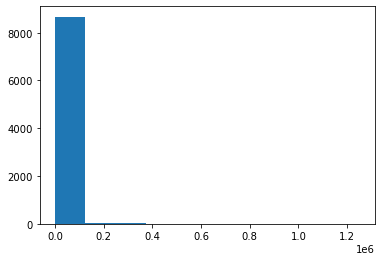

In [18]:
lunar = pd.read_csv('../data/lunar-impact-craters_v08-2015-09.csv.bz2', sep='\t')
treatment = pd.read_csv('../data/treatment.csv.bz2', sep='\t')
citations = pd.read_csv('../data/mag-30k-citations.csv.bz2', sep='\t')
lunar.dropna(subset=['7. Radius [m]'])
treatment.dropna(subset=['re78'])
citations.dropna(subset=['citations'])

r = lunar["7. Radius [m]"]
i = treatment.re78
c = citations.citations

_ = plt.hist(r)

The graph for the radius of the moon defitenly has the potential to become a log normal graph. It peaks on the beginning, like a log normal graph. However, although it looks like all the values are in one bin, you can see that there are some values next to that one very tall bin. It is definitely not a normal distribution graph.

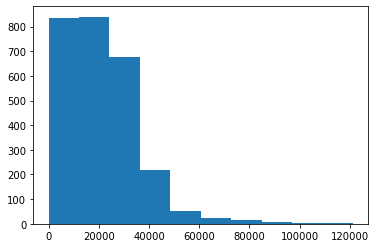

In [19]:
_ = plt.hist(i)

The graph for the treatment defintely looks like a log normal graph. It peaks near the beginning and slowly decreases as the values on the x axis increases.

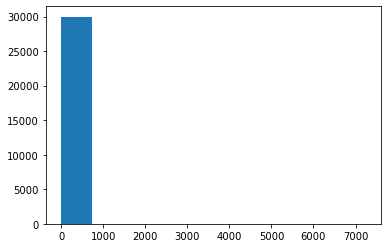

In [20]:
_ = plt.hist(c)

The graph for the citations does not look like a log normal graph. It looks like all the values are stacked into one bin or column. 

# 2. Explore Central Limit Theorem

## 1. Calculate the expected value and variance of this random variable.
### Note: these are theoretical values and not related to any samples. If you use functions like mean or var here then you have misunderstood the concepts!
#### Hint: read lecture notes 1.3.4 (Expected Value and Variance), and Openintro Statis- tics 3.4 (Random variables), in particular 3.4.2 (Variability). I recommend to use the shortcut formula Var X = EX^2 − (EX)^2.

In [21]:
np.random.seed(2)
r = np.random.randint(0,2, size=10)*2 - 1
EX = -1 * 0.5 + 1 * 0.5
EX2 = 1 * 0.5 + 1 * 0.5
expected_variance = EX2 - EX

|Xi|Probability|Xi-EX|(x-EX)^2|
|:----:|:-----:|:------:|:---:|
|-1|.5|1|1|
|1|.5|-1|1|

In [22]:
EX #Expected Value

0.0

In [23]:
expected_variance # variance

1.0

## 2. Choose your number of repetitions R. 1000 is a good number but you can also take 10,000 or 100,000 to get smoother histograms.
### Note: number of repetitions R is not the same as sample size S here. You will create samples of size S for R times below. For instance you will create R = 1000 times a sample of size S = 5. Please understand the difference, it is a fequent source of confusion

In [24]:
R = 1000

## 3. Create a vector of R random realizations of X. Make a histogram of those. Comment the shape of the histogram.
### Note: in this case we have R = 1000 repetitions and samples are of size S = 1 as we look at individual realizations.
### Hint: it takes some tweaking to get nice histograms of discrete distributions. The simplest way is just to make many bars (most of which will be 0) by adding argument bins=100 to plt.hist.

In [25]:
randoms = []
S = 1
np.random.seed(9)
for i in range(R):
    randoms.append(np.random.randint(0,2, S)*2 - 1)

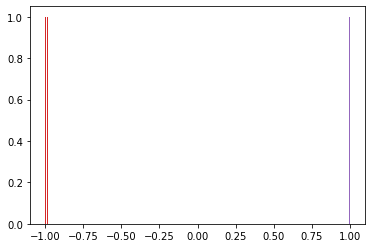

In [26]:
_ = plt.hist(randoms, bins = 100)

The shape of the graph isn't log normal. It is closer to symmetrical, but it is not a normally distributed graph. It just has vertical lines near -1 and 1.

## 4. Compute and report mean and variance of the sample you created (just use np.mean and np.var). NB! Here we talk about sample mean and sample variance. Compare these numbers with the theoretical values computed at question 1 above.

In [27]:
np.mean(randoms)

-0.028

In [28]:
np.var(randoms)

0.9992160000000001

The mean and variance computed with the numpy function is very similar to the ones calculated using the formula above.

## 5. Now create R pairs of random realizations of X (i.e. sample size S = 2). For each pair, compute its mean. You should have R means. Make the histogram. How does this look like?
### Hint: while you can do this using loops, it is more useful to create a R × 2 matrix of realizations of X, where each row represents one pair. Thereafter you compute means by rows and you have R pair means. See python notes numpy statistical functions for an example.

In [29]:
random_means = []
S = 2
np.random.seed(6)
for i in range(R):
    random_means.append((np.random.randint(0,2, S)*2 - 1).mean())


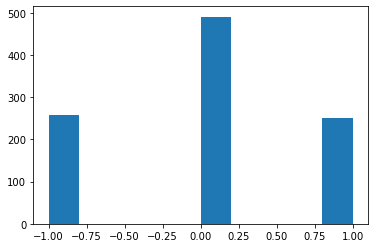

In [30]:
_ = plt.hist(random_means)

The histogram looks a little more normal, as there is a peak in the middle. However, it is not continous, but rather discrete. It still looks pretty symmetrical and also doesn't look like a log normal graph. It seems to only have values at -1, 0, and 1.

## 6. Compute and report mean of the R pair means, and variance of the means. NB! we talk about sample mean and sample variance again, where sample is your sample of R pair means.

In [31]:
np.mean(random_means) #mean of R pair means

-0.007

In [32]:
np.var(random_means) #variance of R pair means

0.5089509999999999

## 7. Compute the expected value and variance of the pair means, i.e. the theoretical concepts. This mirrors what you did in 1. Compare the theoretical values with the sample values above. Are those fairly similar? Note that according to CLT, the variance of a pair mean should be just 1/2 of what you got above as for pairs S = 2.


|Xi|Probability|X^2|
|:----:|:-----:|:---:|
|-1|.25 |1
|0|.5|0| 
|1|.25|1

In [33]:
EX = -1 * 0.25 + 1 * 0.25 + 0 * .5
EX2 = 1 * 0.25 + 1 * 0.25 + 0 * .5
expected_variance = EX2 - EX
print(EX) # expected value
expected_variance

0.0


0.5

I found that the expected value is still 0, and the variance is now 0.5. According to the CLT, as the sample size grows, the mean will become closer to the expected value. The CLT also states that as the sample size increase, the variance gets smaller. For example, if the sample is 2 times larger, the variance 1/2 smaller. This is present in this example. Compared to the variance of when S=1, the variance for S=2 is half as small.

The mean and variance calculated with the numpy function are now closer to the expected value and variance calculated by the formula than when S=1.

## 8. Now instead of pairs of random numbers, repeat this with 5-tuples of random numbers (i.e. S = 5 random numbers per one repetition, and still R = 1000 repetitions in total). Compare the theoretical and sample version of mean and variance of 5-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?


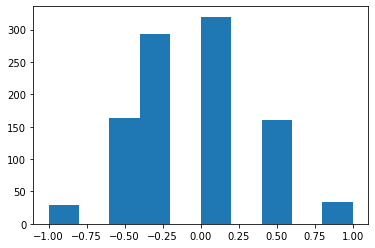

In [42]:
S = 5
random_5 = []
np.random.seed(14)
for i in range(R):
    random_5.append((np.random.randint(0,2, S)*2 - 1).mean())
_ = plt.hist(random_5)

The histogram looks a little more continous than before. There are now more values spread across instead of just at -1, 0, and 1. I also notice that there is now a peak and it is getting more normally distributed

In [53]:
print(np.mean(random_5)) #sample mean
print(np.var(random_5)) #sample variance

0.006800000000000002
0.20315376


According to the CLT, as the sample size grows, the sample mean will become closer to the expected value. The current samlple mean is 0.0068. This is very close to 0. One can assume that the expected value is 0 (You can also assume this by looking at the smaller samples where the expected value was 0). As for variance, as the sample size grows, the variance gets smaller. To be specific, if the sample size grows by 2x, then the variance is 1/2 as big. Using this logic and our earlier calculations of S=1, the variance should be 1/5, or 0.2. 

expected value: 0

variance: 1/5 or 0.2

## 9. Repeat with 25-tuples... (Including compute the expectation and theoretical variance, and compare those with sample mean, sample variance)


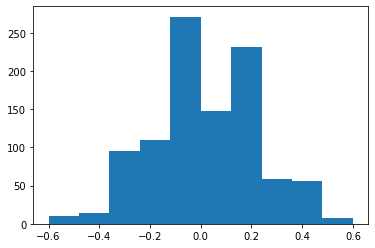

In [55]:
S = 25
random_25 = []
np.random.seed(25)
for i in range(R):
    random_25.append((np.random.randint(0,2, S)*2 - 1).mean())
_ = plt.hist(random_25)

The histogram now has values distributed across the graph. It seems to be getting a little more normal and there is a peak near 0. 

In [49]:
print(np.mean(random_25)) #sample mean
print(np.var(random_25)) #sample variance

-0.00152
0.0425448896


The same logic applies to this problem. Here, the sample size increased from 5 to 25. The sample mean is now even closer to 0. In addition, the variance is getting smaller. To calculate the variance, you would just take the variance of S=1 and divide by 25. Both the sample mean and the sample variance are close to the expected value and the variance.

expected value: 0

variance: 1/25 or 0.04

## 10. ... and with 1000-tuples. Do not forget to compare with theoretical results.

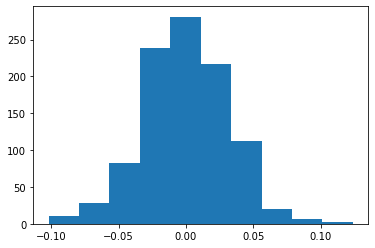

In [50]:
S = 1000
random_1000 = []
np.random.seed(13)
for i in range(R):
    random_1000.append((np.random.randint(0,2, S)*2 - 1).mean())
_ = plt.hist(random_1000)    

The histogram looks normally distributed and symmetric. There is a definite peak at 0 and it immitates a bell-shaped curve.

In [51]:
print(np.mean(random_1000)) #sample mean
print(np.var(random_1000)) #sample variance

-0.0001259999999999999
0.000987732124


With S=1000, the sample mean and the sample variance are even closer than when S=25. The expected value is still 0. To get the variance, take the variance of S=1 and divide it by 1000.

expected value: 0

variance: 0.001

## 11. Comment on the tuple size, and how the shape of the histogram changes when the tuple size increases.

As the tuple(sample) size increases the variance gets smaller and the sample mean gets closer to the expected value. In addition, the variance size would decrease by 1/n, where n is the sample size. With the increasing tuple size, the histogram gets more and more symmetric and has a more normal distribution.

## 12. Explain why do the histograms resemble normal distribution as S grows. In particular, explain what happens when we move from single values S = 1 to pairs S = 2. Why did two equal peaks turn into a “山”-shaped histogram?

The CLT states that as S grows, the distribution tend to be more normally distributed. By using S=1 and S=2 as an example, you can think of it like this:

When S=1, it is just a list like the following [-1,1,1,-1,-1]. If you were plot it on a histogram, there would only be values on -1 and 1. This is why we got the histogram with only two vertical lines for S=1. When S=2, there is now a pair of values for each element in the list [[1,-1], [1,1],[-1,-1], [-1,1]]. It is not possible to just simply graph it, so we must take the average of each element and then graph the results in a histogram. For the above list, the averages are 0, 1, -1, and 0. As you can see, 0 appears twice, which is why there is a peak at 0 on the graph S=2. This same concept is applied to when the sample size increases. When the sample size increases, the mean of each element will be more variable. It is no longer just -1, 1, and 0. This is why the histogram looks more normal. 

# Finally... How much time did you spend on this PS?

Around 6 hours